In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test_data.csv")

In [ ]:
train_data.shape , test_data.shape

((29165, 20), (7292, 20))

In [ ]:
train_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [ ]:
train_data.describe()


,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

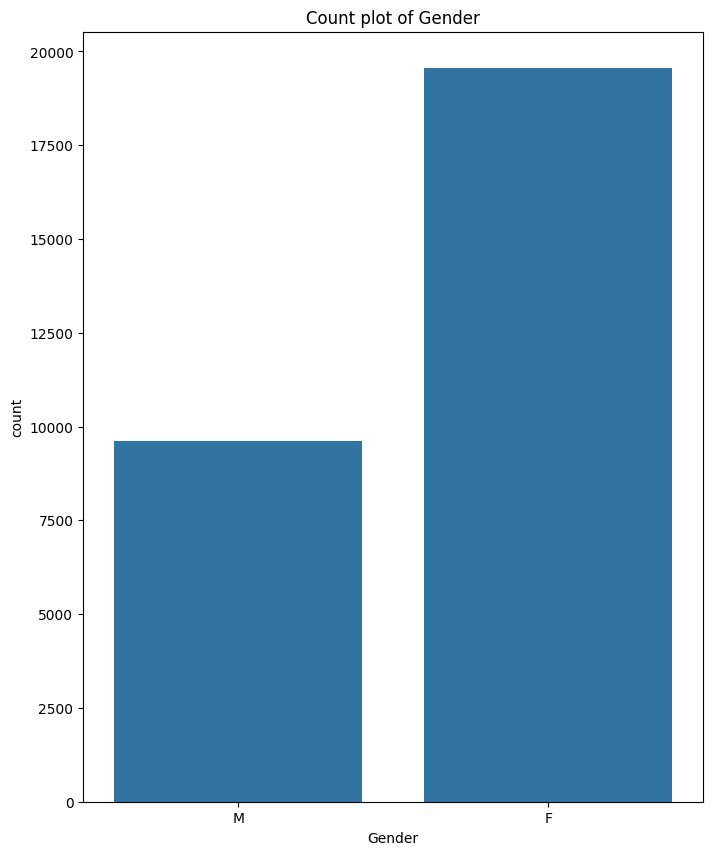

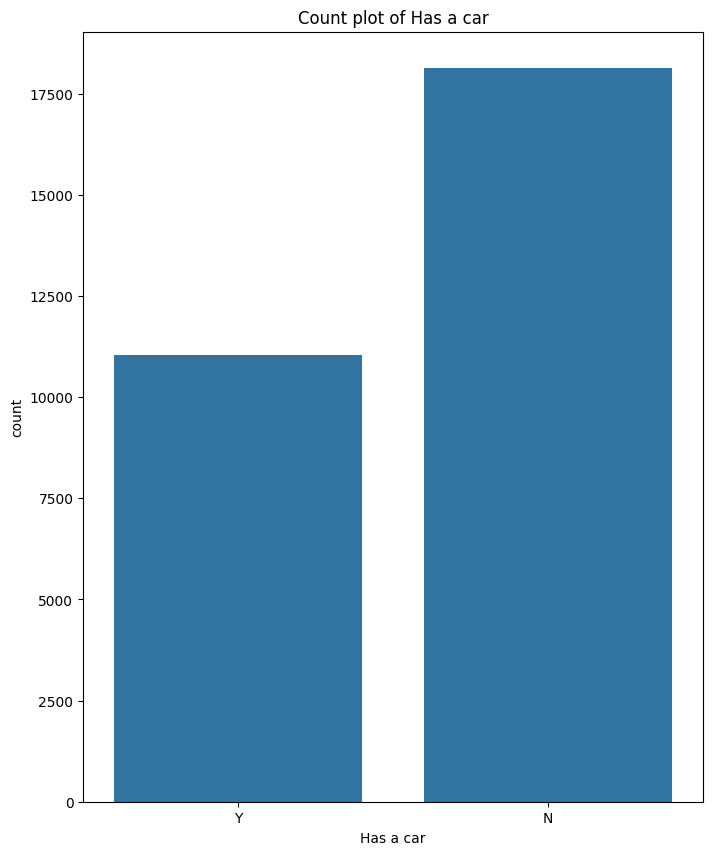

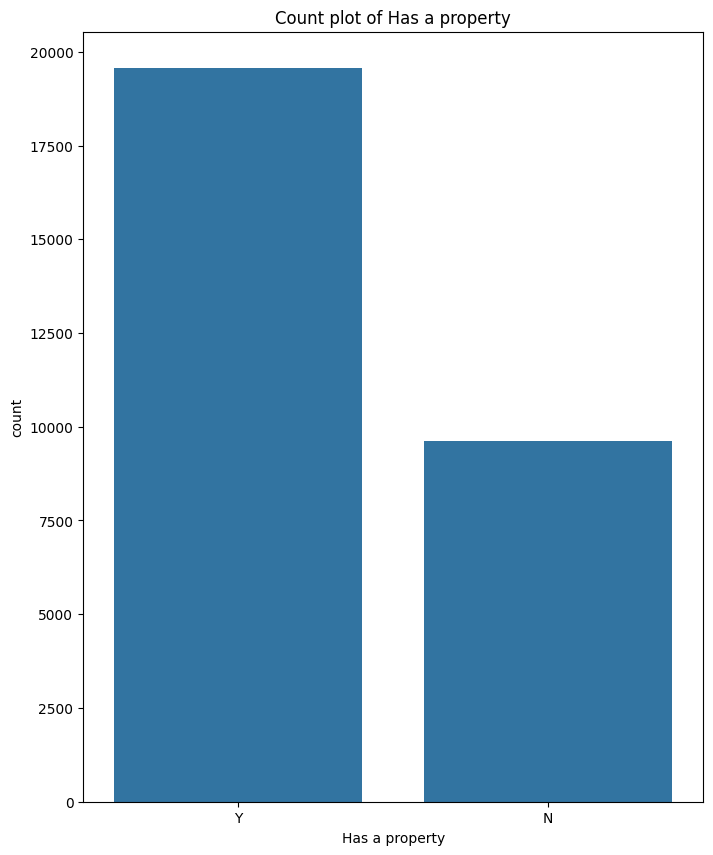

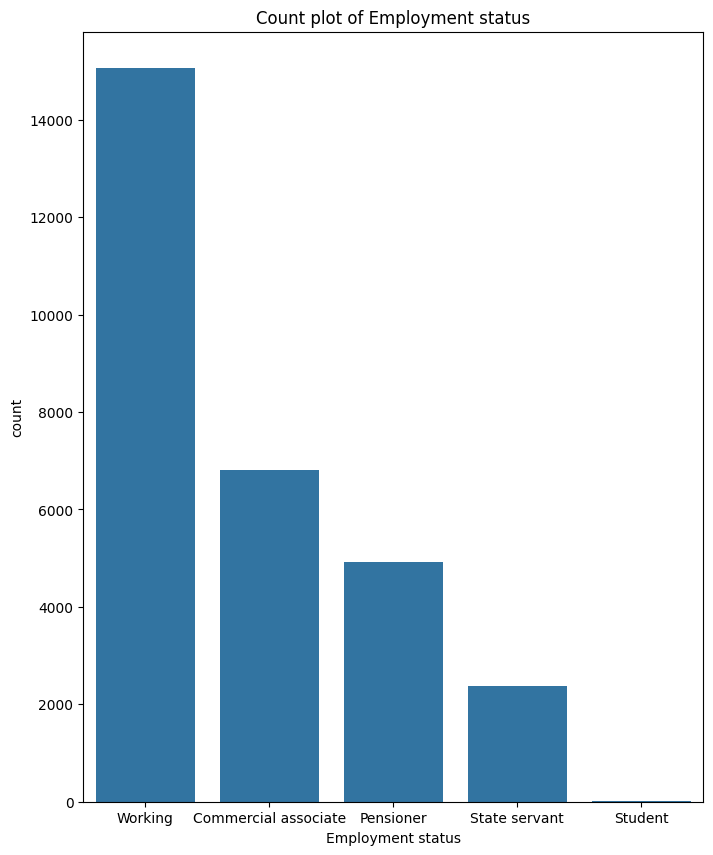

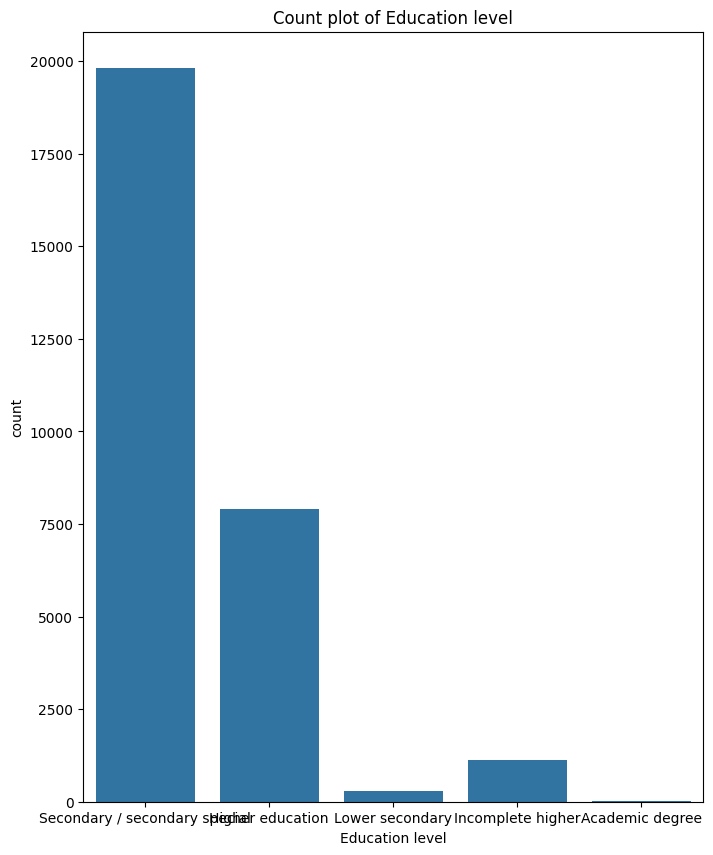

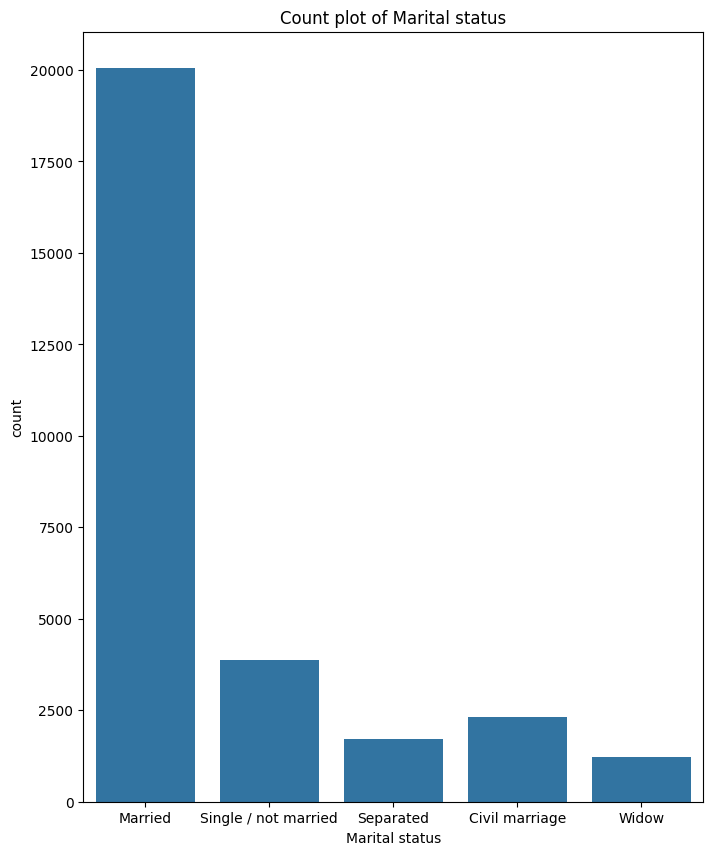

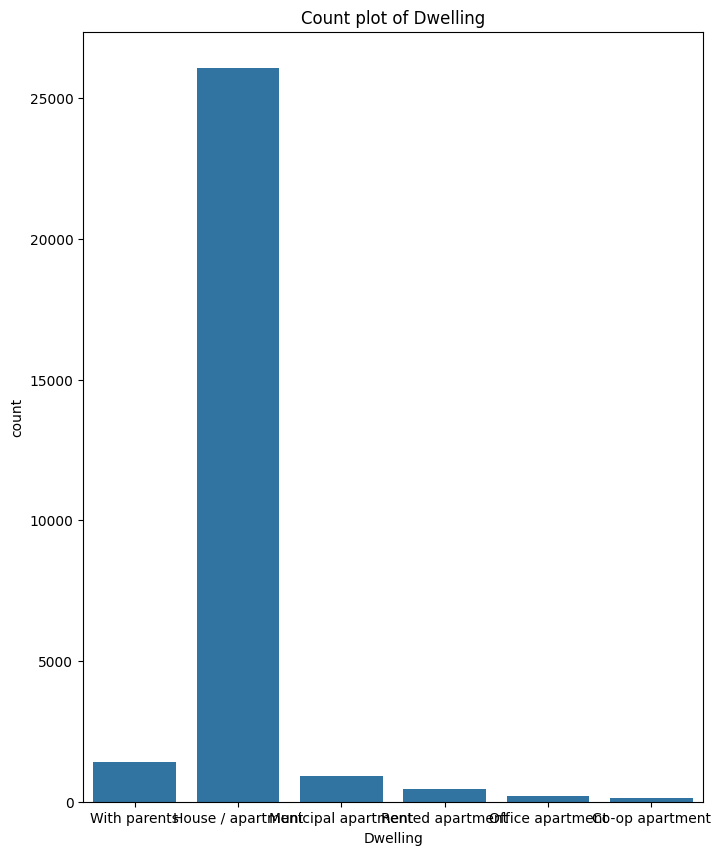

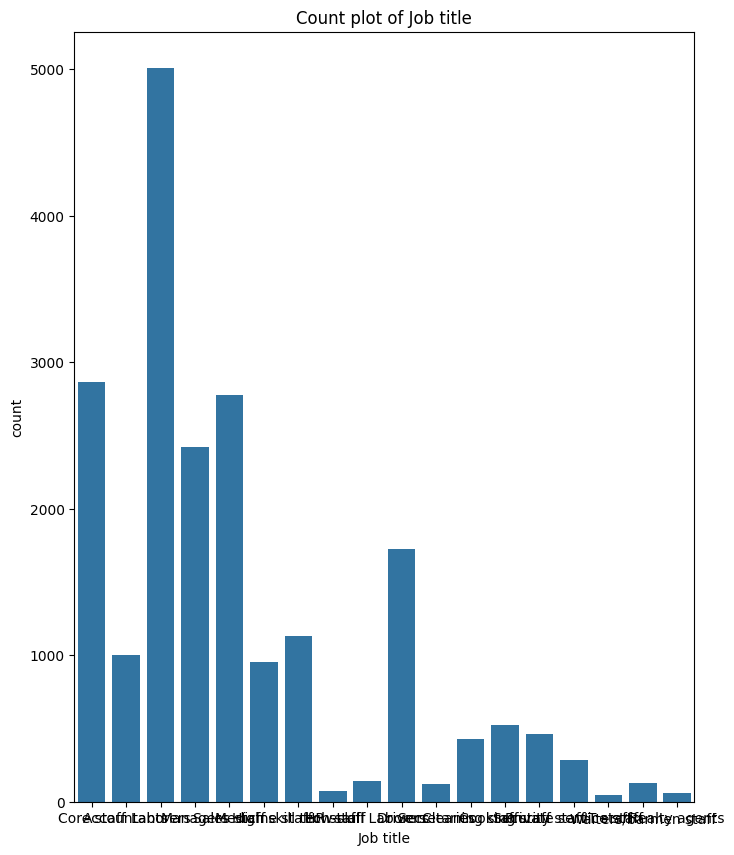

In [ ]:
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 10))
    sns.countplot(x=col,data=train_data)
    plt.title(f'Count plot of {col}')
    plt.show()

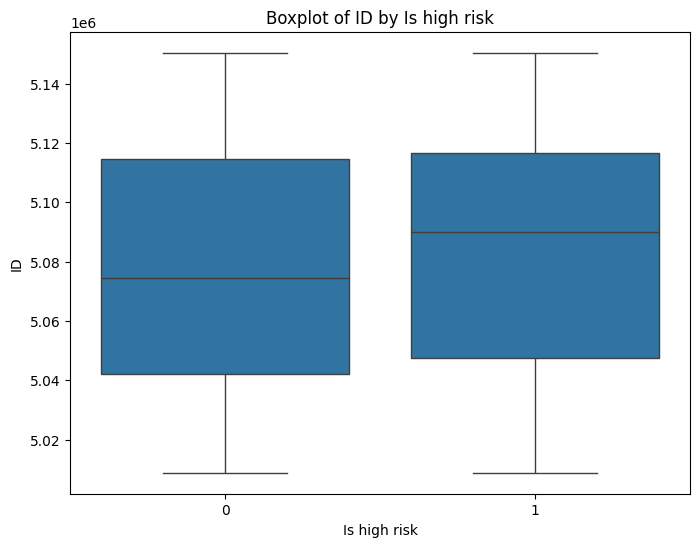

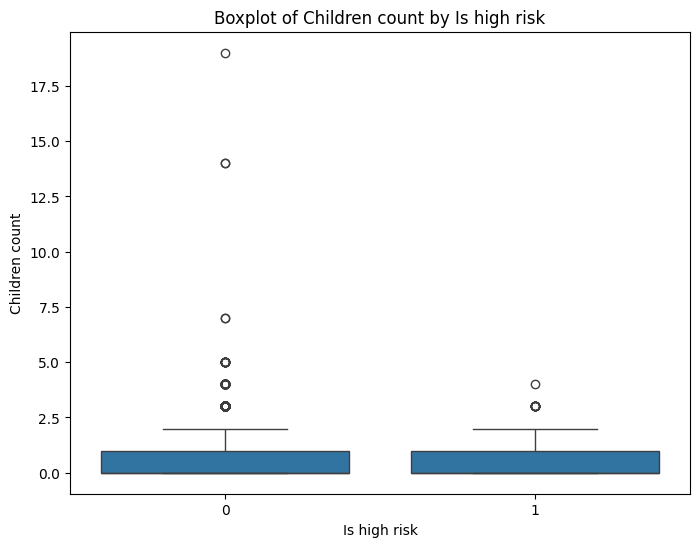

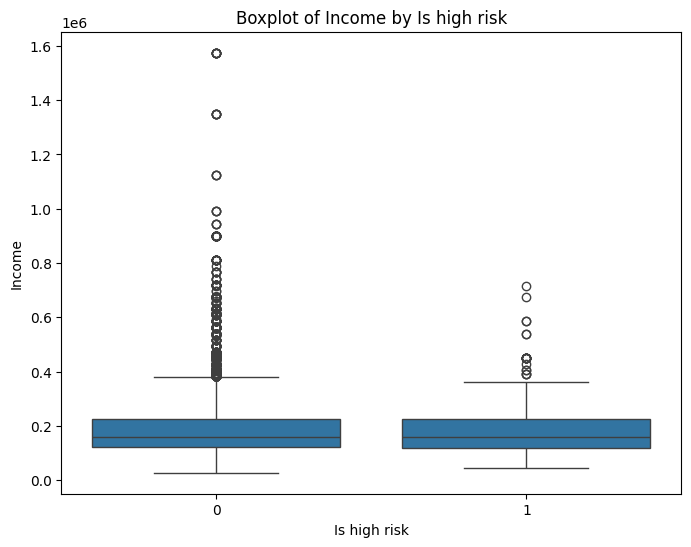

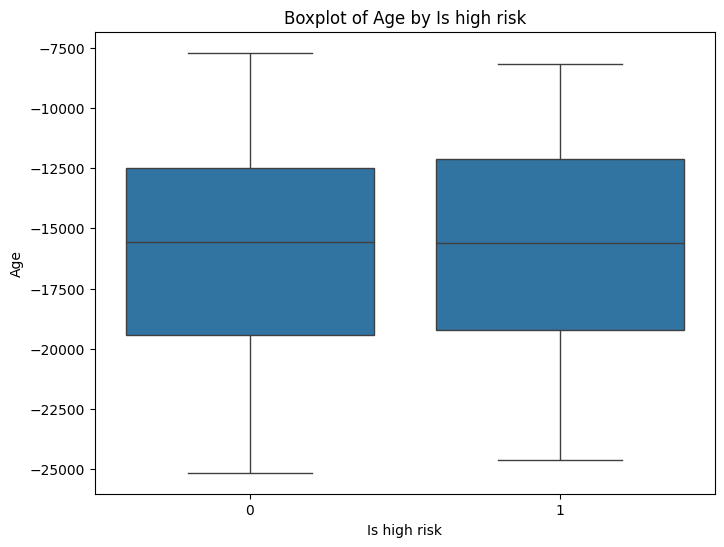

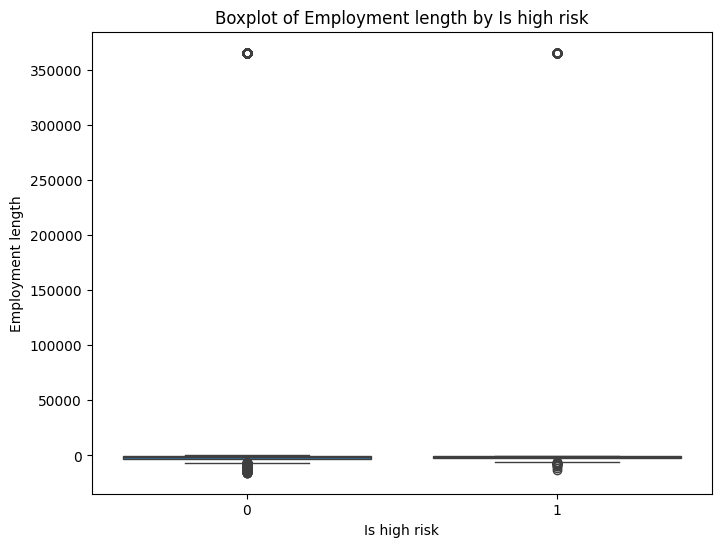

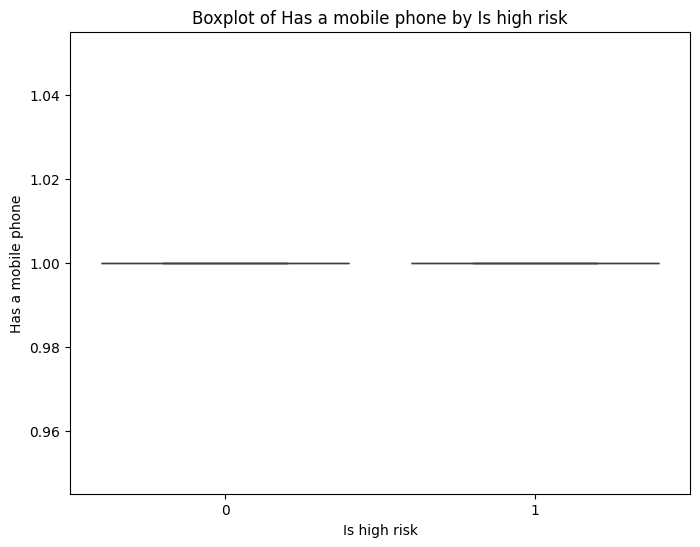

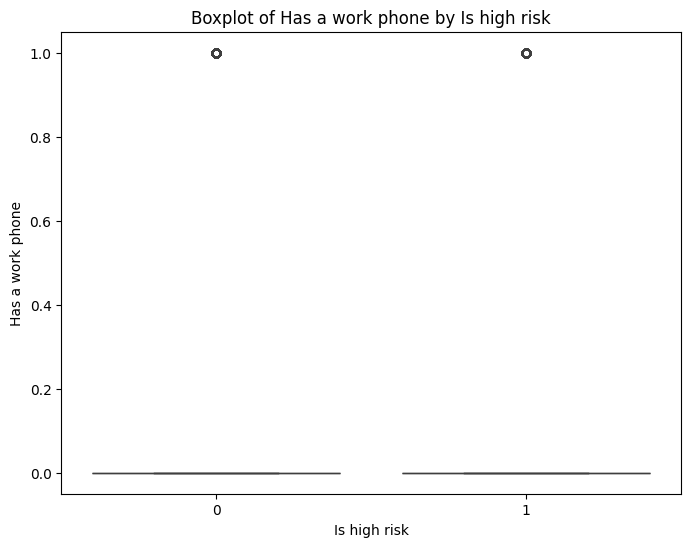

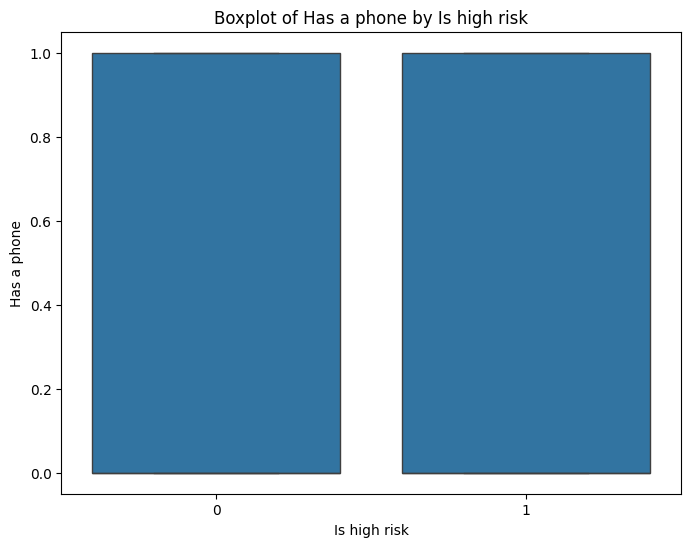

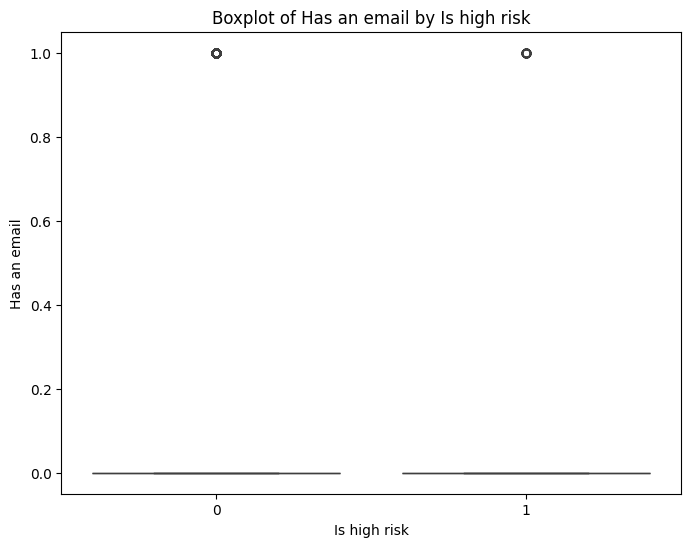

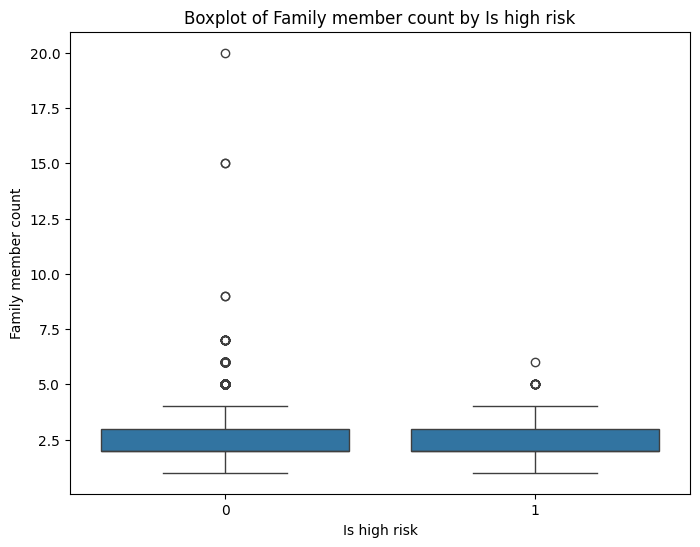

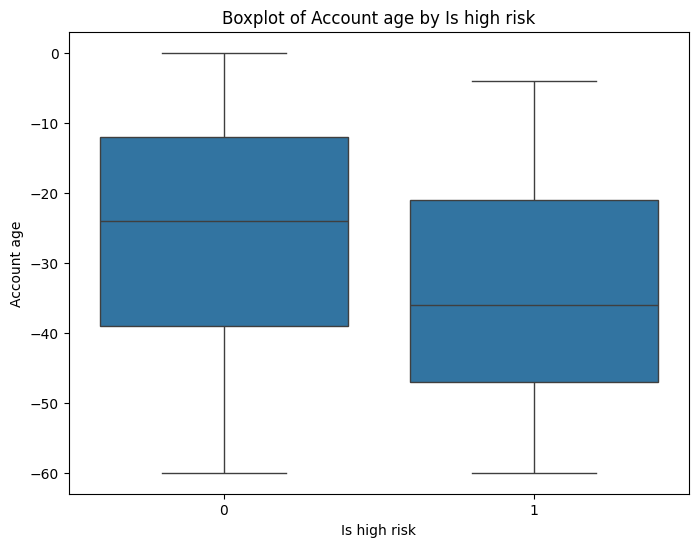

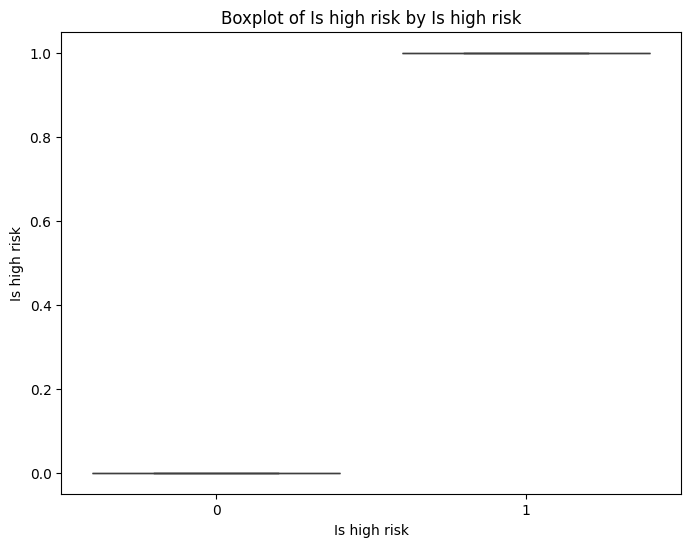

In [ ]:
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Is high risk', y=col, data=train_data)
    plt.title(f'Boxplot of {col} by Is high risk')
    plt.show()

In [ ]:
count_null=train_data.isnull().sum()
print(count_null)

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [ ]:
train_data.fillna(train_data.mode().iloc[0], inplace=True)

In [ ]:
count_null=train_data.isnull().sum()
print(count_null)

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64


In [ ]:
# Check the distribution of the target variable
target_dist = train_data['Is high risk'].value_counts()
print("Target variable distribution:\n", target_dist)


Target variable distribution:
 0    28666
1      499
Name: Is high risk, dtype: int64


<Axes: xlabel='Is high risk', ylabel='count'>

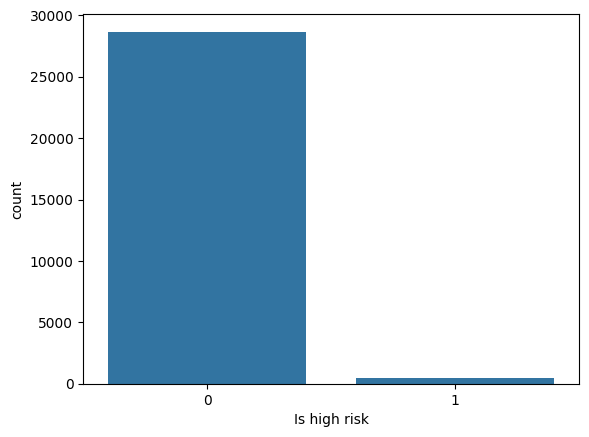

In [ ]:
sns.countplot(x=train_data['Is high risk'],data=train_data)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate features (X) and target variable (y)
X = train_data.drop(columns=['Is high risk'])
y = train_data['Is high risk']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Update train_data with resampled data
train_data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the shape of train_data after resampling
print("Shape of train_data after resampling:", train_data_resampled.shape)


Shape of train_data after resampling: (57332, 20)


In [ ]:
count_null=train_data_resampled.isnull().sum()
print(count_null)

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64


In [ ]:
categorical_features = train_data_resampled.select_dtypes(include=['object']).columns
print("unique categories")

for feature in categorical_features:
    unique_categories = train_data_resampled[feature].nunique()
    print(f"{feature}:  {unique_categories} ")


unique categories
Gender:  2 
Has a car:  2 
Has a property:  2 
Employment status:  5 
Education level:  5 
Marital status:  5 
Dwelling:  6 
Job title:  18 


In [ ]:
le_features = ['Gender','Has a car','Has a property']
label_encoder = LabelEncoder()

for feature in le_features:
    train_data_resampled[feature] = label_encoder.fit_transform(train_data_resampled[feature])

print(train_data_resampled.head())


        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  

In [ ]:
ohe_features = ['Employment status','Education level','Marital status','Dwelling','Job title']

# Perform one-hot encoding
train_data_encoded = pd.get_dummies(train_data_resampled, columns=ohe_features, drop_first=True)

# Display the encoded dataset
print(train_data_encoded.head())

        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

     Age  Employment length  Has a mobile phone  Has a work phone  ...  \
0 -16271              -3111                   1                 0  ...   
1 -10130              -1651                   1                 0  ...   
2 -12821              -5657                   1                 0  ...   
3 -20929              -2046                   1                 0  ...   
4 -16207               -515                   1                 0  ...   

   Job title_Laborers  Job title_Low-skill Laborers  Job title_Managers  \
0                   0        

In [ ]:
train_data_encoded.dtypes

ID                                                 int64
Gender                                             int64
Has a car                                          int64
Has a property                                     int64
Children count                                     int64
Income                                           float64
Age                                                int64
Employment length                                  int64
Has a mobile phone                                 int64
Has a work phone                                   int64
Has a phone                                        int64
Has an email                                       int64
Family member count                              float64
Account age                                      float64
Is high risk                                       int64
Employment status_Pensioner                        uint8
Employment status_State servant                    uint8
Employment status_Student      

In [ ]:
numerical_features = train_data_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])

print(train_data_encoded.head())

         ID    Gender  Has a car  Has a property  Children count    Income  \
0 -1.016840  1.332754   1.296464        0.767852       -0.579214 -0.525887   
1 -0.837372 -0.750326   1.296464       -1.302334        0.763751 -0.525887   
2 -0.021957 -0.750326  -0.771329        0.767852        2.106715 -0.069770   
3  0.777930 -0.750326   1.296464        0.767852       -0.579214  1.754696   
4  0.611907 -0.750326  -0.771329       -1.302334       -0.579214  0.842463   

        Age  Employment length  Has a mobile phone  Has a work phone  ...  \
0 -0.077875          -0.465376                 0.0         -0.550427  ...   
1  1.366763          -0.454919                 0.0         -0.550427  ...   
2  0.733719          -0.483612                 0.0         -0.550427  ...   
3 -1.173646          -0.457748                 0.0         -0.550427  ...   
4 -0.062820          -0.446782                 0.0         -0.550427  ...   

   Job title_Laborers  Job title_Low-skill Laborers  Job title_Manag

In [ ]:

X = train_data_encoded.drop('Is high risk', axis=1)
y = train_data_encoded['Is high risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=42)

Logistic Regression
              precision    recall  f1-score   support

        -1.0       0.61      0.65      0.63      5644
         1.0       0.64      0.60      0.62      5823

    accuracy                           0.63     11467
   macro avg       0.63      0.63      0.63     11467
weighted avg       0.63      0.63      0.63     11467

ROC AUC Score: 0.6284640334225347


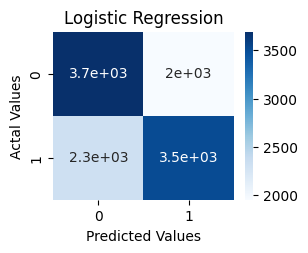

Random Forest
              precision    recall  f1-score   support

        -1.0       1.00      0.99      1.00      5644
         1.0       0.99      1.00      1.00      5823

    accuracy                           1.00     11467
   macro avg       1.00      1.00      1.00     11467
weighted avg       1.00      1.00      1.00     11467

ROC AUC Score: 0.9972537207654145


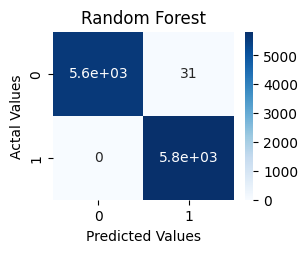

Decision Tree
              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99      5644
         1.0       0.99      1.00      0.99      5823

    accuracy                           0.99     11467
   macro avg       0.99      0.99      0.99     11467
weighted avg       0.99      0.99      0.99     11467

ROC AUC Score: 0.9922927002126152


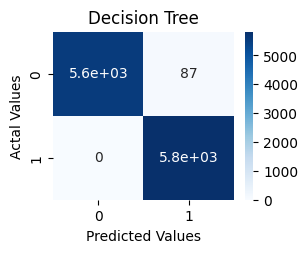

Gradient Boosting
              precision    recall  f1-score   support

        -1.0       0.81      0.74      0.78      5644
         1.0       0.77      0.84      0.80      5823

    accuracy                           0.79     11467
   macro avg       0.79      0.79      0.79     11467
weighted avg       0.79      0.79      0.79     11467

ROC AUC Score: 0.788468630408533


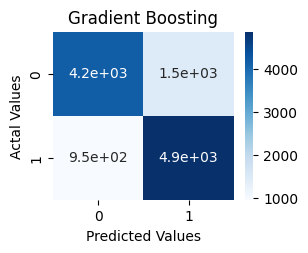

In [ ]:
# Evaluate models
models = {'Logistic Regression': logreg_model, 'Random Forest': rf_model, 'Decision Tree':tree_model,
          'Gradient Boosting': gb_model}
i=0
for name, model in models.items():
    i+=1
    plt.subplot(2,2,i)
    print(name)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    confusion_matrixs = metrics.confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(confusion_matrixs, index = [str(i) for i in range(2)], columns = [str(i) for i in range(2)])
    sns.heatmap(cm_df, annot=True, cmap='Blues')
    plt.title(name)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()


In [ ]:
for feature in le_features:
    test_data[feature] = label_encoder.fit_transform(test_data[feature])

test_data = pd.get_dummies(test_data, columns=ohe_features, drop_first=True)

test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])


In [ ]:
X = test_data.drop('Is high risk', axis=1)
y = test_data['Is high risk']
y_pred=rf_model.predict(X_test)


              precision    recall  f1-score   support

        -1.0       0.81      0.74      0.78      5644
         1.0       0.77      0.84      0.80      5823

    accuracy                           0.79     11467
   macro avg       0.79      0.79      0.79     11467
weighted avg       0.79      0.79      0.79     11467

0.788468630408533


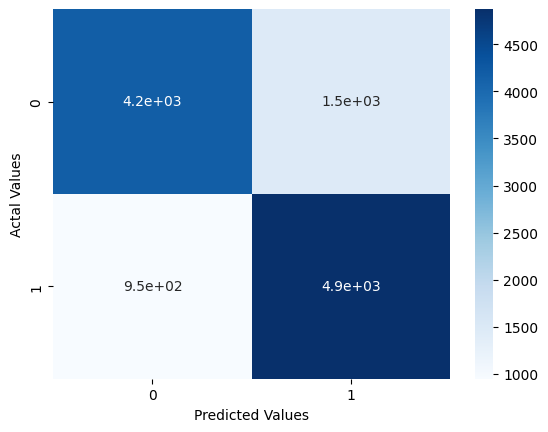

In [ ]:
print(classification_report(y_test, y_pred))
print("ROC AUC Score:",roc_auc_score(y_test, y_pred))
confusion_matrixs = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(confusion_matrixs, index = [str(i) for i in range(2)], columns = [str(i) for i in range(2)])
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
